In [8]:
## Semantic Segmentation Evaluation ##

#import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score 
import math
import seaborn as sns
import shutil
import sys
import traceback
#from mlxtend.plotting import plot_confusion_matrix
from PIL import Image
 

In [9]:
# path to tree images that were annotated to evaluate the semantic segmentation model
annotated_trees_path = '/Users/edwardamoah/Documents/GitHub/pv_mrv/statistical_analysis/data/annotated_trees'

In [10]:
# Confusion Matrix Calculation Code, which I got from ChapGPT

def getConfusionMatrix(true_labels, predicted_labels):
    """ Takes true and predicted lable list and return a 3 dimensional array confusion maxtrix"""
    # Calculate the confusion matrix
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for i in range(len(true_labels)):
        confusion_matrix[true_labels[i], predicted_labels[i]] += 1

    return confusion_matrix


In [11]:
def getConfusionArray(mask_path):
    """ take file location and return a 1 dimensional list for all the pixels where background is 0, trunk is 1, and tag is 2 """
    # Open the image
    #img = Image.open('/Users/edwardamoah/Documents/GitHub/tree_dbh_estimation/data/outputs/seg_image_original_1675151454814.png')
    img = Image.open(mask_path)

    # Get the size of the image
    width, height = img.size

    # Create an empty list to store the pixel values
    pixels = []

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get the RGB values of the pixel
            pixel = img.getpixel((x, y))
            #print(pixel)
            if pixel == (255, 255, 255): # background
                pixels.append(0)
            elif pixel == (0, 85, 0):  # trunk
                pixels.append(1)
            elif pixel == (255, 150, 100): # tag
                pixels.append(2)

    # Print the list of pixel values
    return pixels


In [12]:
# Get confusion matrix for all original image


files = [file for file in os.listdir(annotated_trees_path) if "original" in file]

confusion_matrix_dict = {}
for temp in files:
    temp_image = os.path.join(annotated_trees_path, temp)
    file = temp_image.split("_")[-3]
    true_labels = getConfusionArray(temp_image)

    #predicted_labels = getConfusionArray(f'/Users/edwardamoah/Documents/GitHub/tree_dbh_estimation/data/outputs/seg_image_original_{file}.png')
    #/Users/edwardamoah/Documents/GitHub/cetcil_data_analysis/cetcil/JupyterCode/data/static/tree_trunk/outputs_tree_evaluation
    predicted_labels = getConfusionArray(f'/Users/edwardamoah/Documents/GitHub/cetcil_data_analysis/cetcil/JupyterCode/data/static/tree_trunk/outputs_tree_evaluation/seg_image_original_{file}.png')

    confusion_matrix_dict[temp] = getConfusionMatrix(true_labels, predicted_labels)


cf = sum(confusion_matrix_dict.values())



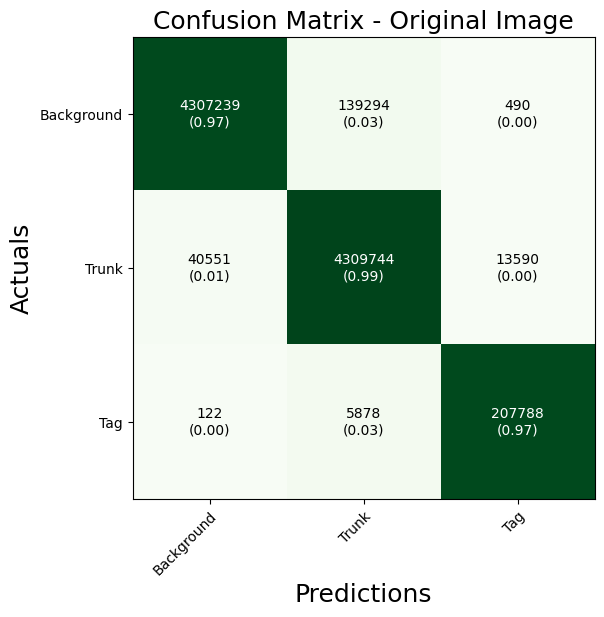

In [13]:
# Confusion matrix evaluation based on the original image without zooming
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = np.array(cf)
class_names = ['Background', 'Trunk', 'Tag']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, show_absolute=True, show_normed=True , figsize=(6, 6), cmap=plt.cm.Greens, class_names=class_names)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Original Image', fontsize=18)
plt.show()


In [14]:
# Get confusion matrix for all zoomed image

files = [file for file in os.listdir(annotated_trees_path) if "zoomed" in file]

confusion_matrix_dict = {}
for temp in files:
    temp_image = os.path.join(annotated_trees_path, temp)
    file = temp_image.split("_")[-3]
    true_labels = getConfusionArray(temp_image)

    #/Users/edwardamoah/Documents/GitHub/tree_dbh_estimation/data/outputs/seg_image_zoomed_img_1675151454814.png
    #/Users/edwardamoah/Documents/GitHub/cetcil_data_analysis/cetcil/JupyterCode/data/static/tree_trunk/outputs_tree_evaluation/seg_image_zoomed_img_1675152298141.png
    predicted_labels = getConfusionArray(f'/Users/edwardamoah/Documents/GitHub/cetcil_data_analysis/cetcil/JupyterCode/data/static/tree_trunk/outputs_tree_evaluation/seg_image_zoomed_img_{file}.png')

    confusion_matrix_dict[temp] = getConfusionMatrix(true_labels, predicted_labels)


cf1 = sum(confusion_matrix_dict.values())


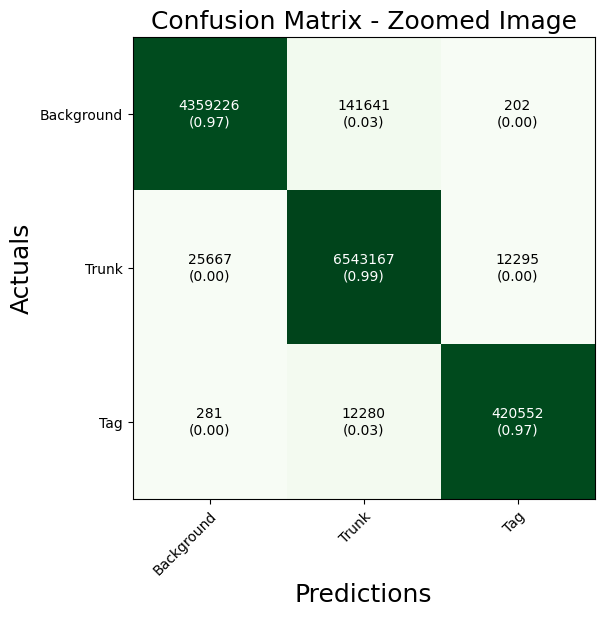

In [15]:
#Get confusion matrix for zommed images. This is the confusion matrix that will be reported in the paper, 
# as it is the mask of the zoomed images that is used for dbh prediction

conf_matrix = np.array(cf1)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, show_absolute=True, show_normed=True ,figsize=(6, 6), cmap=plt.cm.Greens, class_names= class_names)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Zoomed Image', fontsize=18)
plt.show()


In [16]:
# calculate precision, recall, and f1-scores

In [17]:
# precision for orginal images
for i in range(3):
 print(round(cf[i][i]/np.sum(cf[i]),4) * 100)

96.86
98.76
97.19


In [18]:
# recall for original images

for i in range(3):
    tot = np.sum(cf[0][i]) + np.sum(cf[1][i]) + np.sum(cf[2][i])
    print(round(cf[i][i]/tot,4)*100)

99.06
96.74000000000001
93.65


In [19]:
# precision for zommed images
for i in range(3):
 print(round(cf1[i][i]/np.sum(cf1[i]),4) * 100)

96.85000000000001
99.42
97.1


In [20]:
# recall for zommed images

for i in range(3):
    tot = np.sum(cf1[0][i]) + np.sum(cf1[1][i]) + np.sum(cf1[2][i])
    print(round(cf1[i][i]/tot,4)*100)

99.41
97.7
97.11


In [21]:
# function to calculate f1-score
def getF1_score(precision, recall):
    return 2 * ((precision * recall)/(precision + recall))

In [22]:
# f1-score for background class orignal images
getF1_score(96.86,99.06)

97.94764801959984

In [23]:
# f1-score for trunk class for original images
getF1_score(98.76,96.74000000000001)

97.73956419437343

In [24]:
# f1-score for tag class for original images
getF1_score(97.19,93.65)

95.3871672605324

In [25]:
# f1-score for background class zoomed images
getF1_score(96.85000000000001,99.41)

98.11330378069908

In [26]:
# f1-score for tree trunk class zoomed images
getF1_score(99.42,97.7)

98.55249594155845

In [27]:
# f1-score for tag class zoomed images
getF1_score(97.1,97.11)

97.10499974254674

In [28]:
# helper function for calculating Intersection Over Union (IOU)
def getIOU(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

In [29]:
# Function for IOU calculation

def getArray(mask_path, label):
    """ take file location and return a 1 dimensional list for all the pixels where background is 0, trunk is 1, and tag is 2 """
    # Open the image
    #img = Image.open('/Users/edwardamoah/Documents/GitHub/tree_dbh_estimation/data/outputs/seg_image_original_1675151454814.png')
    img = Image.open(mask_path)

    # Get the size of the image
    width, height = img.size

    # Create an empty list to store the pixel values
    pixels = []

    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Get the RGB values of the pixel
            pixel = img.getpixel((x, y))
            #print(pixel)
            if label == "background":
                if pixel == (255, 255, 255): # background
                    pixels.append(1)
                elif pixel == (0, 85, 0):  # trunk
                    pixels.append(0)
                elif pixel == (255, 150, 100): # tag
                    pixels.append(0)
            elif label == "trunk":
                if pixel == (255, 255, 255): # background
                    pixels.append(0)
                elif pixel == (0, 85, 0):  # trunk
                    pixels.append(1)
                elif pixel == (255, 150, 100): # tag
                    pixels.append(0)
            elif label == 'tag':
                if pixel == (255, 255, 255): # background
                    pixels.append(0)
                elif pixel == (0, 85, 0):  # trunk
                    pixels.append(0)
                elif pixel == (255, 150, 100): # tag
                    pixels.append(1)
                

    # Print the list of pixel values
    return pixels


In [39]:
# Get IOU calculation for all original image

files = [file for file in os.listdir(annotated_trees_path) if "zoomed" not in file]
files = [file for file in files if ".DS_Store" not in file ]

confusion_matrix_dict = {}
background_iou = []
trunk_iou = []
tag_iou = []
#miou = []

for temp in files:
    temp_image = os.path.join(annotated_trees_path, temp)
    file = temp_image.split("_")[-3]
    true_labels = getConfusionArray(temp_image)
    true_background = getArray(temp_image, "background")
    true_trunk = getArray(temp_image, "trunk")
    true_tag = getArray(temp_image, "tag")

    pred_file = f'/Users/edwardamoah/Documents/GitHub/pv_mrv/statistical_analysis/data/model_segmentation_mask_output/seg_image_original_{file}.png'
    predicted_labels = getConfusionArray(pred_file)
    pred_background = getArray(pred_file, "background")
    pred_trunk = getArray(pred_file, "trunk")
    pred_tag = getArray(pred_file, "tag")

    #confusion_matrix_dict[temp] = getConfusionMatrix(true_labels, predicted_labels)

    background_iou.append(getIOU(true_background, pred_background))
    trunk_iou.append(getIOU(true_trunk, pred_trunk))
    tag_iou.append(getIOU(true_tag, pred_tag))


In [40]:
# IOU for background class for original images
np.mean(background_iou)

0.951731497804602

In [41]:
# IOU for trunk class for original images 
np.mean(trunk_iou)

0.9403112890427021

In [42]:
# IOU for tag class for original images 
np.mean(tag_iou)

0.88501842611725

In [43]:
# Get IOU calculation for all zoomed image

files = [file for file in os.listdir(annotated_trees_path) if "zoomed" in file]
files = [file for file in files if ".DS_Store" not in file ]

confusion_matrix_dict = {}
background_iou = []
trunk_iou = []
tag_iou = []
#miou = []

for temp in files:
    temp_image = os.path.join(annotated_trees_path, temp)
    file = temp_image.split("_")[-3]
    true_labels = getConfusionArray(temp_image)
    true_background = getArray(temp_image, "background")
    true_trunk = getArray(temp_image, "trunk")
    true_tag = getArray(temp_image, "tag")

    pred_file = f'/Users/edwardamoah/Documents/GitHub/pv_mrv/statistical_analysis/data/model_segmentation_mask_output/seg_image_zoomed_img_{file}.png'
    predicted_labels = getConfusionArray(pred_file)
    pred_background = getArray(pred_file, "background")
    pred_trunk = getArray(pred_file, "trunk")
    pred_tag = getArray(pred_file, "tag")

    #confusion_matrix_dict[temp] = getConfusionMatrix(true_labels, predicted_labels)

    background_iou.append(getIOU(true_background, pred_background))
    trunk_iou.append(getIOU(true_trunk, pred_trunk))
    tag_iou.append(getIOU(true_tag, pred_tag))


In [44]:
# IOU for background class for zoomed images
np.mean(background_iou)

0.9580074395034528

In [45]:
# IOU for trunk class for zoomed images 
np.mean(trunk_iou)

0.9625364344107528

In [46]:
# IOU for tag class for zommed images 
np.mean(tag_iou)

0.9430759692829045

In [34]:
# The code below just loads the calibration datasets and makes the regression model, which is used for calibration.
# The code below is not for semantic segmentation evaluation, but for the calibration 

In [35]:
import pandas as pd
import statsmodels.formula.api as smf


ratio = [3.797585822140869,
 3.219780105037765,
 2.7502836427832986,
 1.7889954492725242,
 3.4443577065000537,
 4.838681791889408,
 2.306289106393861,
 2.378243456978054,
 2.9383486897535205,
 4.688115322164186,
 4.373077209218123,
 3.789786055780032,
 2.636556402197854,
 2.919668902552845,
 1.7852769636700667,
 2.321717374059108,
 3.22468307784103,
 3.809149404400353,
 0.9042703721085809,
 1.1992720111441206,
 1.2786583886477778,
 1.7191844184914222,
 5.579458707101586,
 2.8454161163557234,
 2.4656580160910786,
 0.9394702824526728,
 3.970996440048987,
 1.6586625576935723,
 1.147048000037325,
 1.1252320487945706,
 2.3647776478491087,
 4.370407552373325,
 5.530469468030706,
 2.846140299494055,
 4.368939406941635,
 4.059826020088069,
 2.721782670004265,
 3.9851474875432498,
 5.607753633881514,
 6.082326895188751,
 3.440600577653097,
 3.3169146232416686,
 2.5520536229289648,
 3.416822700977507,
 2.018541117472699,
 2.075559857216936,
 4.793365241789075,
 1.3727478907277286,
 5.395520327781036,
 5.026896797475021,
 3.1705045910580605,
 5.085426941340293]

dbh = [28.3,
 20.0,
 16.7,
 10.4,
 23.2,
 34.3,
 14.7,
 15.9,
 18.8,
 30.0,
 26.45,
 21.2,
 18.5,
 21.0,
 12.2,
 14.8,
 20.7,
 25.1,
 5.0,
 7.2,
 7.2,
 10.85,
 38.0,
 15.8,
 14.9,
 5.5,
 25.7,
 9.1,
 6.6,
 7.0,
 14.0,
 29.9,
 38.5,
 18.0,
 36.9,
 24.7,
 16.3,
 28.5,
 35.9,
 40.7,
 23.6,
 25.0,
 15.8,
 20.1,
 13.5,
 12.9,
 30.5,
 7.6,
 32.6,
 35.1,
 19.9,
 31.9]

calibiration_data = pd.DataFrame({
    "ratio": ratio,
    "measured_dbh": dbh
})

model = smf.ols('measured_dbh ~ ratio', data=calibiration_data)
model = model.fit()

# prediction function
def getPrediction(ratio):
    try:
        new_X = float(ratio)
        pred = model.predict({"ratio": new_X})
        return round(pred.tolist()[0],2)
    except:
        return None

In [36]:
calibiration_data['predicted_dbh'] = calibiration_data['ratio'].apply(getPrediction)

Text(0.5, 1.0, 'Algorithm Calibration Linear Regression Model (n=52)')

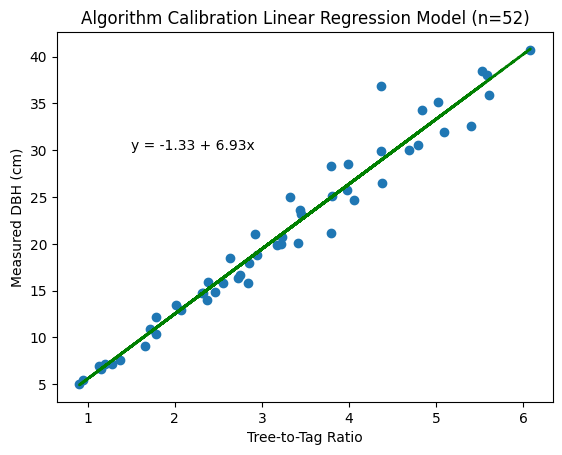

In [37]:
plt.scatter(calibiration_data['ratio'], calibiration_data['measured_dbh'])

x = np.array(calibiration_data['ratio']); y = np.array( [ float(x) for x in calibiration_data['measured_dbh']])
a, b = np.polyfit(x, y , 1)

#plt.scatter(x, y, color='purple')
plt.plot(x, a*x+b, linestyle='--', linewidth=2, color='green')

# add fitted regression equation to plot
plt.text(1.5, 30, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=10)


plt.ylabel("Measured DBH (cm)")
plt.xlabel("Tree-to-Tag Ratio")
plt.title("Algorithm Calibration Linear Regression Model (n=52)")